## NewsMood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.

## Analysis

Trend 1:

Trend 2: 

Trend 3:

In [122]:
#! pip install textblob

In [143]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tweepy
import numpy as np
import seaborn as sns
import json

from datetime import datetime
from textblob import TextBlob, Word, Blobber

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [146]:
# Twitter API keys
import config

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [147]:
# Search for the news stations
target_terms = ["@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

# Variables for holding sentiments
sentiments = []

# Loop through each news station to get the recent 100 tweets
for x in range(5):

    # Loop through all news stations
    for target in target_terms:

        public_tweets = api.user_timeline(target)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"],
                               "Screen_Name": tweet['user']['screen_name'],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg})


#Generated dataframe containing sentiment for Media Sources
df_sentiment_analysis= pd.DataFrame(sentiments) 

df_sentiment_analysis

,Compound,Date,Negative,Neutral,Positive,Screen_Name
0,-0.5574,Tue Mar 06 22:58:05 +0000 2018,0.714,0.286,0.000,BBCNews
1,-0.4215,Tue Mar 06 22:54:58 +0000 2018,0.811,0.189,0.000,BBCNews
2,0.0000,Tue Mar 06 22:46:46 +0000 2018,1.000,0.000,0.000,BBCNews
3,-0.5267,Tue Mar 06 22:46:42 +0000 2018,0.779,0.221,0.000,BBCNews
4,-0.7650,Tue Mar 06 22:46:38 +0000 2018,0.625,0.375,0.000,BBCNews
5,-0.6908,Tue Mar 06 22:46:31 +0000 2018,0.678,0.322,0.000,BBCNews
6,-0.1531,Tue Mar 06 22:38:30 +0000 2018,0.781,0.125,0.094,BBCNews
7,0.0000,Tue Mar 06 22:33:01 +0000 2018,1.000,0.000,0.000,BBCNews
8,-0.7717,Tue Mar 06 22:02:22 +0000 2018,0.511,0.489,0.000,BBCNews
9,0.6124,Tue Mar 06 21:59:21 +0000 2018,0.780,0.057,0.163,BBCNews


In [126]:
# Create CSV from dataframe
df_sentiment_analysis.to_csv('NewsSentimentAnalysis.csv')

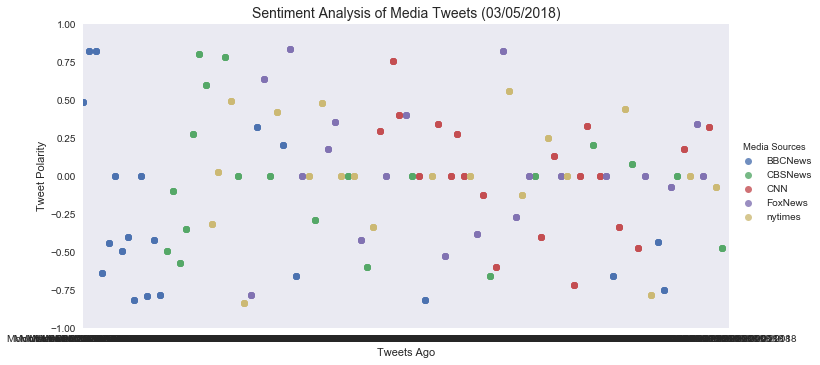

In [139]:
# Plot the sentiments of the last 100 tweets

scatter_plot = sns.lmplot('Date', 'Compound', data=df_sentiment_analysis, aspect=2, fit_reg=False, hue='Screen_Name', legend=False).add_legend(loc="best", title = "Media Sources")
scatter_plot = (scatter_plot.set_axis_labels("Tweet Ago","Tweet Polarity").set(xlim=(0,100),ylim=(-1,1)))


#scatter_plot = sns.FacetGrid(df_sentiment_analysis, 'Date', hue="Screen_Name")
#scatter_plot = (scatter_plot.map(plt.scatter, 'Date', 'Compound' , edgecolor="w").add_legend(loc="best"))

#fg.map(plt.scatter, 'tweet_date_list', 'compound_list', s= 1,edgecolors="black", alpha=0.75).add_legend(loc="best")

now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Sentiment Analysis of Media Tweets ({})'.format(now),fontsize=(14))
plt.grid()

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.show()
plt.savefig("SentimentAnalysis.png") 

In [148]:
# Create Overall Media Sentiment based on Twitter table
Twitter_summary = df_sentiment_analysis.groupby(["Screen_Name"])["Compound"].mean().reset_index()


# Renaming Columns
Twitter_summary.rename_axis({'Screen_Name': 'Media Sources',
                                                 'Compound':  'Average Compound'},axis=1,inplace=True)

# Output Twitter Table dataframe
Twitter_summary

,Media Sources,Average Compound
0,BBCNews,-0.233805
1,CBSNews,-0.065980
2,CNN,0.009485
3,FoxNews,-0.056786
4,nytimes,0.081470


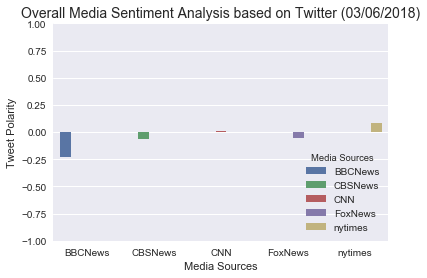

In [149]:
# Plot bar graph
#plt.bar(Twitter_summary['Media Sources'], Twitter_summary['Average Compound'], color='r', alpha=0.5, align="edge")

ax = sns.barplot(x=Twitter_summary['Media Sources'], y=Twitter_summary['Average Compound'], hue=Twitter_summary['Media Sources'], data=Twitter_summary,
                 order=["BBCNews", "CBSNews", "CNN", "FoxNews", "nytimes"])

# Sets the y limits of the current chart
plt.ylim(-1,1)

# Give our chart some labels and a tile
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Overall Media Sentiment Analysis based on Twitter ({})'.format(now),fontsize=(14))
plt.xlabel("Media Sources")
plt.ylabel("Tweet Polarity")

# Print our chart to the screen and save image
plt.show()
plt.savefig("OverallSentimentAnalysisTwitter.png")